# Import

In [14]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
from matplotlib.image import imread
import urllib.request
from PIL import Image

import locale
import os #intéragir avec le système d'exploitation
import zipfile #lecture et écriture pour les fichiers zip
import urllib #gestion des url
import sqlite3
import sys
import os

# Obtenir le répertoire de travail courant (répertoire du notebook)
current_dir = os.getcwd()

# Chemin relatif vers le répertoire contenant fonctions.py
relative_path = 'Openclassrooms'

# Chemin absolu vers le répertoire contenant fonctions.py
absolute_path = os.path.join(current_dir, relative_path)

# Insérer le chemin relatif dans sys.path
sys.path.insert(1, absolute_path)

# Importer les fonctions depuis fonctions.py
from fonctions import data_information, doublons

# Database

In [2]:
# API information
app_id = 'ac0a54eb'
app_key = '9b74ac60634d9fbf1a408dd6c4912147'
endpoint = 'https://api.edamam.com/api/food-database/v2/parser'

# Paramètres de la requête
params = {
    'app_id': app_id,
    'app_key': app_key,
    'ingr': 'champagne' 
}

In [3]:
response = requests.get(endpoint, params=params)

if response.status_code == 200:
    data = response.json()
    #print(json.dumps(data, indent=4))
    print(data.keys())
    #print(data['hints'])
    #print(data['parsed'])
    
    # Extraction des champs nécessaires
    filtered_data = []
    for item in data.get('hints', []):
        food = item.get('food', {})
        filtered_data.append({
            'foodId': food.get('foodId'),
            'label': food.get('label'),
            'category': food.get('category'),
            'foodContentsLabel': food.get('foodContentsLabel'),
            'image': food.get('image')
        })
else:
    print(f"Erreur lors de la requête : {response.status_code}")
    print(response.text)

dict_keys(['text', 'parsed', 'hints', '_links'])


In [16]:
# Convertir les données filtrées en DataFrame
df = pd.DataFrame(filtered_data)

data_information(df)
display(df.head())

Nombre de ligne : 20 Nombre de colonne : 5
------
Types des variables :
object    5
dtype: int64
------
% de valeurs manquantes par colonne : 


image                0.80
foodContentsLabel    0.05
foodId               0.00
label                0.00
category             0.00
dtype: float64

,foodId,label,category,foodContentsLabel,image
0,food_a656mk2a5dmqb2adiamu6beihduu,Champagne,Generic foods,None,https://www.edamam.com/food-img/a71/a718cf3c52...
1,food_b753ithamdb8psbt0w2k9aquo06c,"Champagne Vinaigrette, Champagne",Packaged foods,OLIVE OIL; BALSAMIC VINEGAR; CHAMPAGNE VINEGAR...,None
2,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne",Packaged foods,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...,https://www.edamam.com/food-img/d88/d88b64d973...
3,food_a9e0ghsamvoc45bwa2ybsa3gken9,"Champagne Vinaigrette, Champagne",Packaged foods,CANOLA AND SOYBEAN OIL; WHITE WINE (CONTAINS S...,None
4,food_an4jjueaucpus2a3u1ni8auhe7q9,"Champagne Vinaigrette, Champagne",Packaged foods,WATER; CANOLA AND SOYBEAN OIL; WHITE WINE (CON...,None


In [ ]:
# Sélectionner les 10 premiers produits
df=df.head(10)

# Stocker les données dans un fichier CSV
df.to_csv('champagne_data.csv', index=False)

print("Données sauvegardées dans 'champagne_data.csv'")

In [5]:
display(df)

,foodId,label,category,foodContentsLabel,image
0,food_a656mk2a5dmqb2adiamu6beihduu,Champagne,Generic foods,None,https://www.edamam.com/food-img/a71/a718cf3c52...
1,food_b753ithamdb8psbt0w2k9aquo06c,"Champagne Vinaigrette, Champagne",Packaged foods,OLIVE OIL; BALSAMIC VINEGAR; CHAMPAGNE VINEGAR...,None
2,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne",Packaged foods,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...,https://www.edamam.com/food-img/d88/d88b64d973...
3,food_a9e0ghsamvoc45bwa2ybsa3gken9,"Champagne Vinaigrette, Champagne",Packaged foods,CANOLA AND SOYBEAN OIL; WHITE WINE (CONTAINS S...,None
4,food_an4jjueaucpus2a3u1ni8auhe7q9,"Champagne Vinaigrette, Champagne",Packaged foods,WATER; CANOLA AND SOYBEAN OIL; WHITE WINE (CON...,None
5,food_bmu5dmkazwuvpaa5prh1daa8jxs0,"Champagne Dressing, Champagne",Packaged foods,SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFIT...,https://www.edamam.com/food-img/ab2/ab2459fc2a...
6,food_alpl44taoyv11ra0lic1qa8xculi,Champagne Buttercream,Generic meals,sugar; butter; shortening; vanilla; champagne;...,None
7,food_am5egz6aq3fpjlaf8xpkdbc2asis,Champagne Truffles,Generic meals,butter; cocoa; sweetened condensed milk; vanil...,None
8,food_bcz8rhiajk1fuva0vkfmeakbouc0,Champagne Vinaigrette,Generic meals,champagne vinegar; olive oil; Dijon mustard; s...,None
9,food_a79xmnya6togreaeukbroa0thhh0,Champagne Chicken,Generic meals,"Flour; Salt; Pepper; Boneless, Skinless Chicke...",None


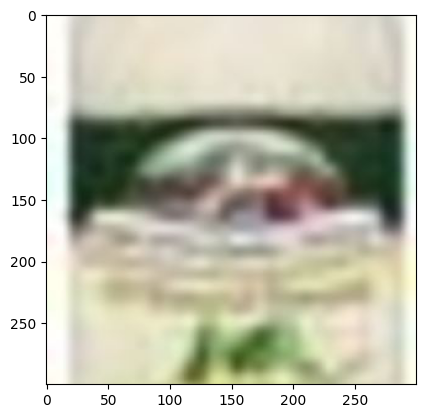

In [17]:
filename = df["image"][2]

with urllib.request.urlopen(filename) as url:
    image = Image.open(url)

# Convertir l'image PIL en un tableau numpy pour l'affichage
image_np = np.array(image)

plt.imshow(image_np)
plt.show()

**COMMENTAIRE**

On peut voir dans les produits avec l'ingrédient champagne qu'il y a des produits très variés. Ici la demande est pour une nouvelle catégorie produit 'L'épicerie fine'. 

- Sur 20 produits 80% n'ont pas d'image et donc ne peuvent pas servir dans la classification par image. 
- On peut aussi remarquer que la qualité d'image de certains produits ne permet pas de les utiliser.